# Exploratory Data Analysis (EDA) Template
# 1. Importación de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

# Cargar el Dataset

In [4]:
df = pd.read_csv(r"C:\Users\javie\Downloads\bank_dataset.CSV")


# Muestro la estructura del DF

In [18]:
df.shape

(11162, 17)

# Muestra las 10 primeras filas del dataset

In [25]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42.0,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56.0,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60.0,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37.0,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28.0,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


# Información general del Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


# Descripción estadística del Dataset

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Histograma de cada variable numérica

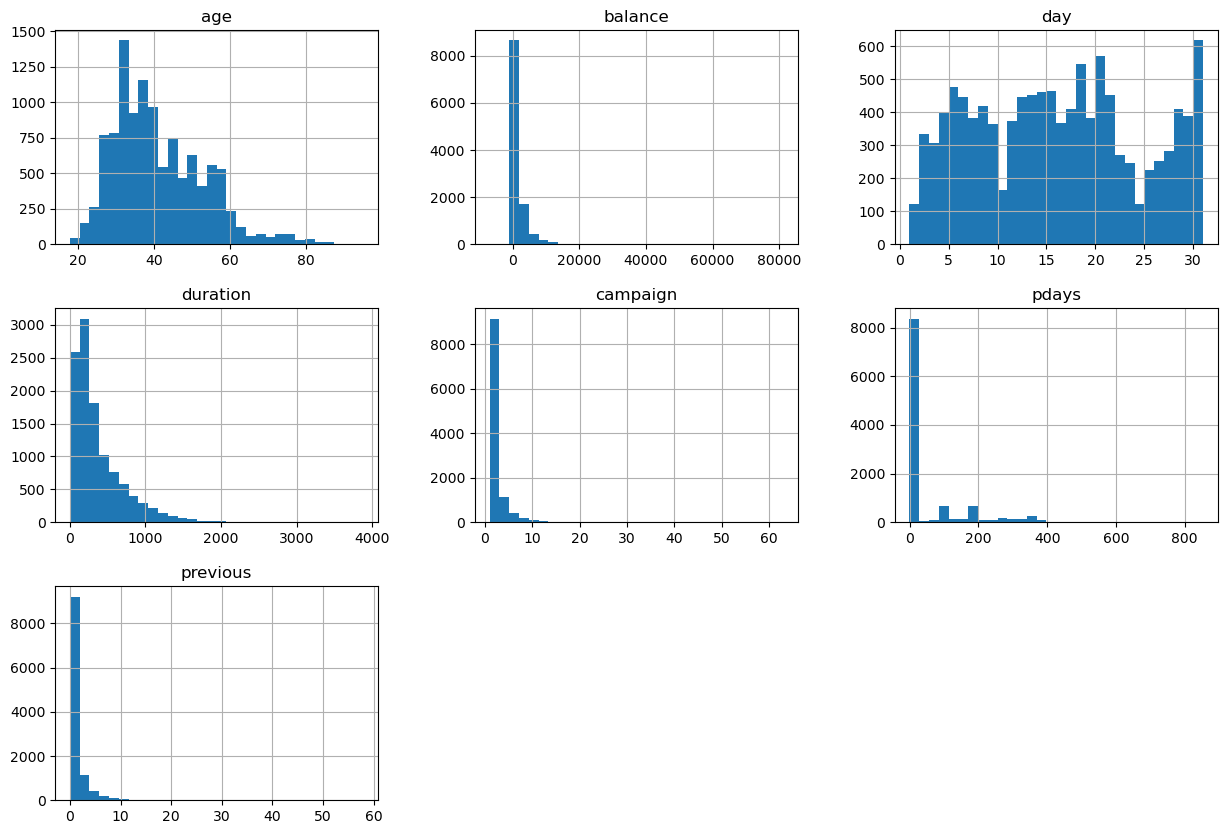

In [8]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Contar los valores de cada variable categórica

In [9]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

# Visualización de valores nulos

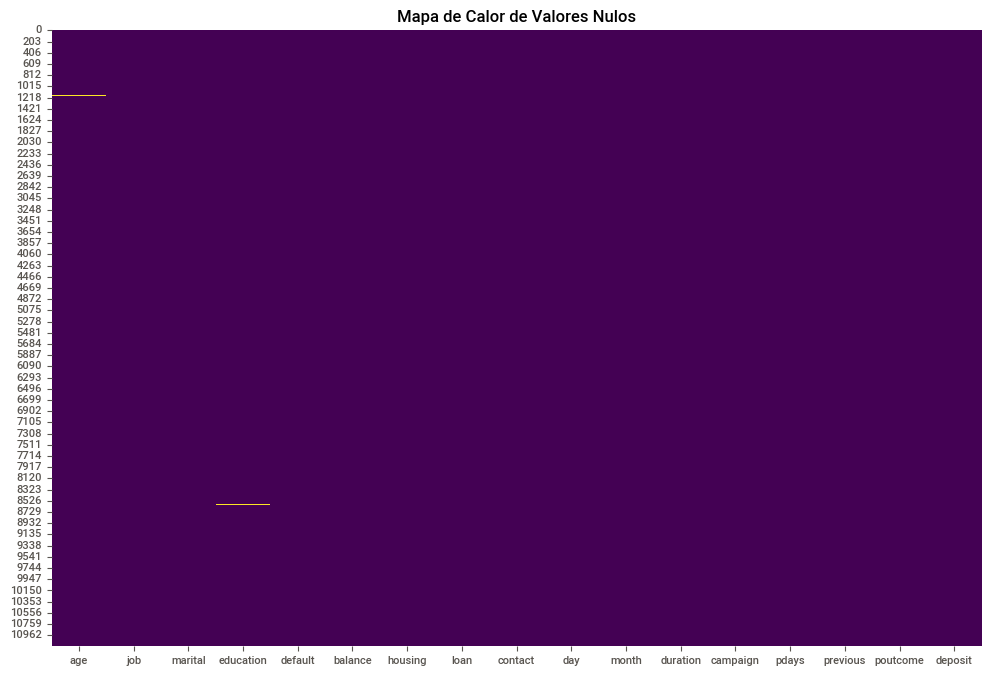

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

# Contar los valores nulos por columnas

In [23]:
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

# Visualizar los registros que tienen age nulo

In [16]:
df[df["age"].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
4019,NaN,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no
6763,NaN,technician,single,tertiary,no,686,yes,no,unknown,30,may,98,2,-1,0,unknown,no
8419,NaN,blue-collar,married,secondary,no,1782,yes,no,unknown,19,jun,549,1,-1,0,unknown,no
9470,NaN,management,married,tertiary,no,552,no,no,cellular,28,jul,761,8,-1,0,unknown,no
9552,NaN,admin.,married,secondary,no,1648,yes,no,cellular,19,nov,172,3,-1,0,unknown,no
9751,NaN,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
10678,NaN,technician,divorced,tertiary,no,0,yes,no,cellular,2,jun,72,1,-1,0,unknown,no


# Correlación entre edad y balance

In [12]:
selected_columns = ['age','balance']
df_selected = df [selected_columns]
correlation_matrix = df_selected.corr()
correlation_matrix

,age,balance
age,1.000000,0.112217
balance,0.112217,1.000000


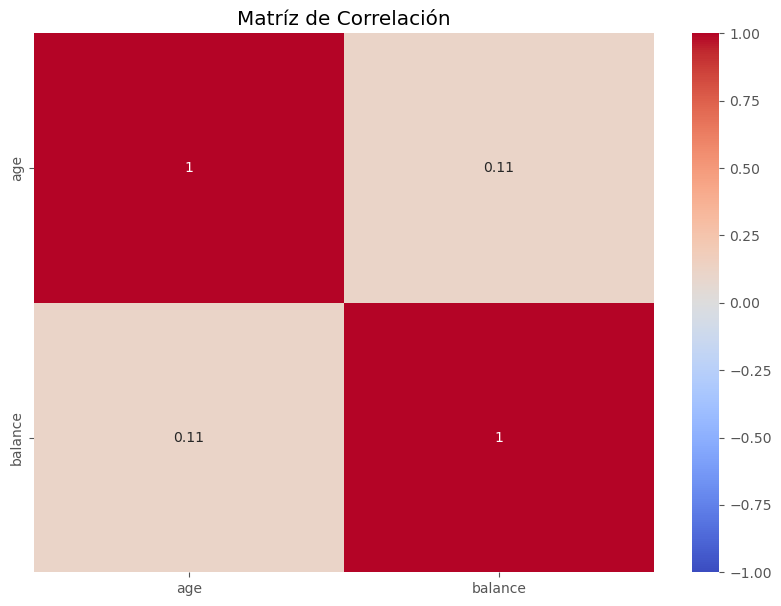

In [13]:
plt.figure(figsize=(10, 7))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Matríz de Correlación')

plt.show()

# EDA automático con Sweetviz

In [24]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Conclusiones:
Después de realizar este ejercicio de EDA, puedo concluir que estas herramientas, como Sweetviz, resultan extremadamente útiles para obtener una visión general de los datos, especialmente cuando se trabaja con grandes volúmenes de información. Nos permiten identificar rápidamente características clave sin necesidad de revisar los registros de forma manual.

En cuanto a los datos analizados, he observado que hay muy pocos valores nulos en el DataFrame, representando menos del 1% de las entradas totales. Estos valores se encuentran en columnas no críticas, lo que sugiere que no es estrictamente necesario reemplazarlos para continuar con el análisis o la construcción de un modelo de Machine Learning en esta fase.

No obstante, si decidimos avanzar con un modelo, evaluaremos nuevamente si es necesario aplicar técnicas de imputación de valores nulos o si estos datos pueden ser manejados por el modelo sin afectar su rendimiento.

